## The Big Squeeze - The Effect of Inflation on Housing, Employment and Spending power

### Install and import the required libraries and dependencies

In [299]:
# Install the required libraries
!pip install prophet

In [300]:
!pip install hvplot

In [301]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline

## Read the datasets

In [302]:
#Read Inflation rates (CPI) csv file into a dataframe and display the data

cpi_df=pd.read_csv("../Resources/Data/US_inflation_rates.csv",index_col='date',parse_dates=True).dropna()
cpi_df


,value
date,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2023-02-01,301.648
2023-03-01,301.808
2023-04-01,302.918


In [303]:
#Read the Home price index dataset in to a data frame and display the data
hpi_df=pd.read_csv("../Resources/Data/Home-price-index.csv",index_col='DATE',parse_dates=True).dropna()
hpi_df

,CSUSHPISA
DATE,
1987-01-01,63.964
1987-02-01,64.424
1987-03-01,64.736
1987-04-01,65.132
1987-05-01,65.563
...,...
2023-03-01,298.396
2023-04-01,300.208
2023-05-01,302.685


## Data Pre-processing

In [304]:
 
# Rename the index and column names in both CPI Dataframe and HPI Dataframe 

cpi_df.index.name='Date'
hpi_df.index.name='Date'

cpi_df=cpi_df.rename(columns={'value':'cpi_value'})
hpi_df=hpi_df.rename(columns={'CSUSHPISA':'hpi_value'})

#Display the changed names
display(cpi_df.head())
display(hpi_df.head())

,cpi_value
Date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


,hpi_value
Date,
1987-01-01,63.964
1987-02-01,64.424
1987-03-01,64.736
1987-04-01,65.132
1987-05-01,65.563


In [305]:
# Slice the dataframe to align the timelines of both data frames to include 10 years of data from 2013-01-01 to 2023-06-01
cpi_df=cpi_df.loc['2010-01-01':'2023-06-01']
hpi_df=hpi_df.loc['2010-01-01':'2023-06-01']

#Handle missing values
cpi_df.dropna()
hpi_df.dropna()

display(cpi_df.head())
display(hpi_df.head())

,cpi_value
Date,
2010-01-01,217.488
2010-02-01,217.281
2010-03-01,217.353
2010-04-01,217.403
2010-05-01,217.290


,hpi_value
Date,
2010-01-01,147.396
2010-02-01,145.631
2010-03-01,145.859
2010-04-01,146.403
2010-05-01,146.394


## Normalize the data for better comparison

In [306]:
# Normalize the CPI date by Indexing both dataframes to 100 at a baseline year

def normalize_cpi(x):
    index= (x/231.670) * 100
    return index

cpi_df['cpi_value']=cpi_df['cpi_value'].apply(normalize_cpi)
cpi_df

,cpi_value
Date,
2010-01-01,93.878361
2010-02-01,93.789010
2010-03-01,93.820089
2010-04-01,93.841671
2010-05-01,93.792895
...,...
2023-02-01,130.205896
2023-03-01,130.274960
2023-04-01,130.754090


In [307]:
# Normalize the HPI data by Indexing both dataframes to 100 at a baseline year

def normalize_hpi(x):
    index= (x/146.827) * 100
    return index

hpi_df['hpi_value']=hpi_df['hpi_value'].apply(normalize_hpi)
hpi_df

,hpi_value
Date,
2010-01-01,100.387531
2010-02-01,99.185436
2010-03-01,99.340721
2010-04-01,99.711225
2010-05-01,99.705095
...,...
2023-02-01,202.464806
2023-03-01,203.229651
2023-04-01,204.463757


In [308]:
# Calculate inflation rates
df=pd.DataFrame()
df['Inflation Rate (%)'] = cpi_df['cpi_value'].pct_change() * 100
df

,Inflation Rate (%)
Date,
2010-01-01,NaN
2010-02-01,-0.095178
2010-03-01,0.033137
2010-04-01,0.023004
2010-05-01,-0.051977
...,...
2023-02-01,0.370006
2023-03-01,0.053042
2023-04-01,0.367783


## Visualizations
1. Explore the changes over time for each dataframe
2. Explore the relationship between two dataframes
3. Analyze time based trends

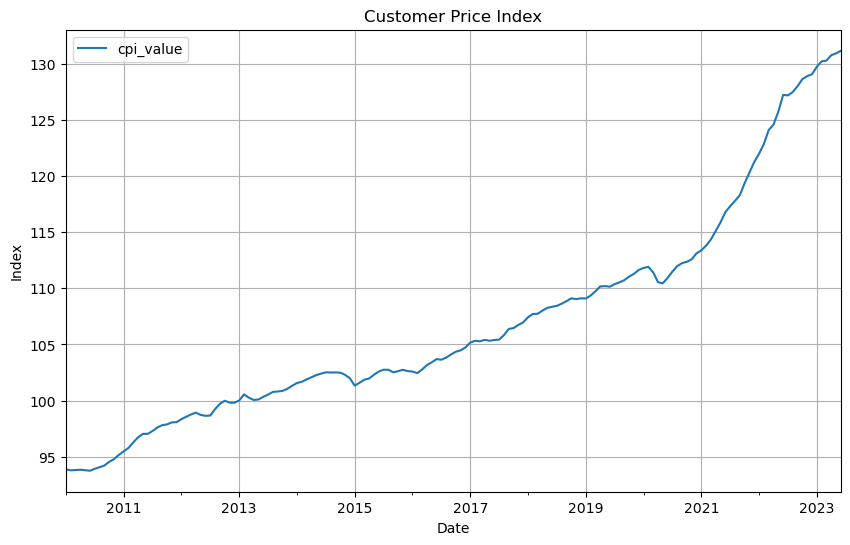

In [309]:
# Plot the CPI dataframe  to explore the changes over time
cpi_df.plot(title="Customer Price Index",figsize=(10,6),legend=True)
plt.ylabel('Index')
plt.grid()
plt.show()

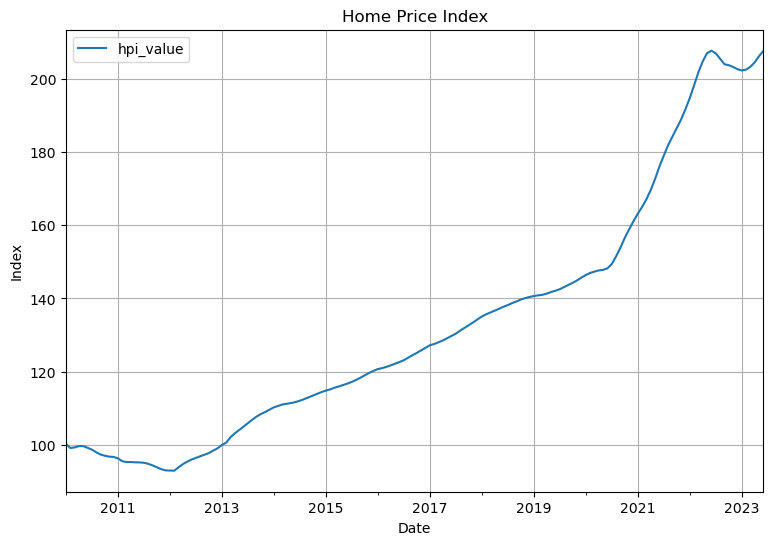

In [310]:
#Plot the HPI dataframe  to explore the changes over time
hpi_df.plot(title="Home Price Index",figsize=(9,6),legend=True)
plt.ylabel('Index')
plt.grid()
plt.show()

## Analysis
* The trends of two data look similar, which suggests there could be a correlation
* Both CPI value and HPI valued have a noticeable upward trend in mid-2020


## Is there a correlation?

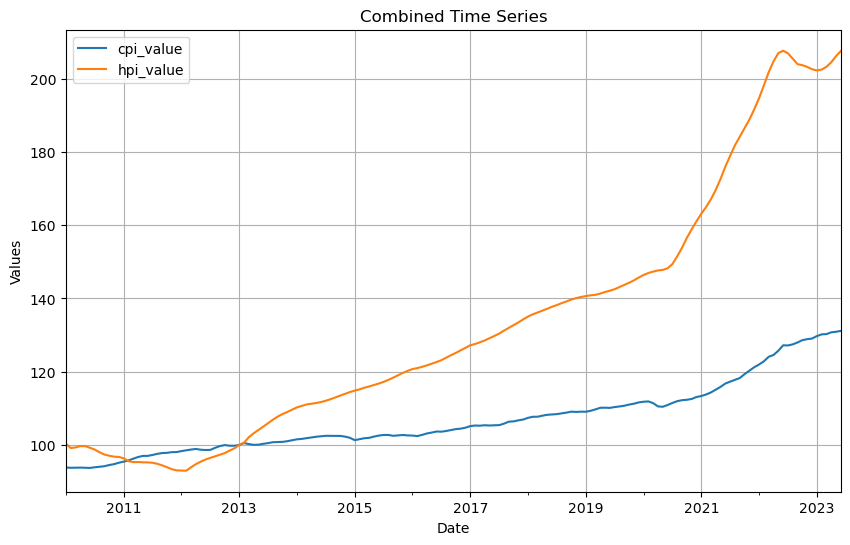

In [311]:
# Combine cpi and hpi data frames
combine_df=pd.concat([cpi_df,hpi_df],axis=1).dropna()
combine_df.plot(title='Combined Time Series', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.show()

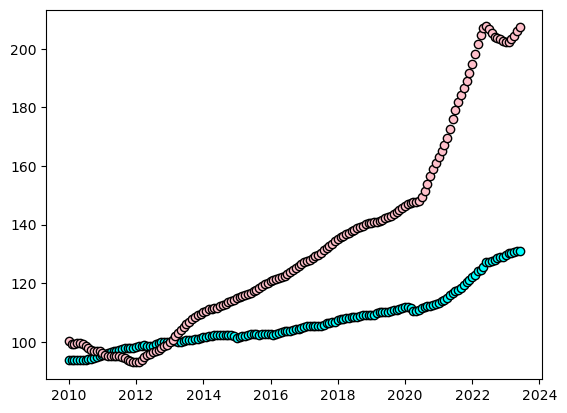

In [312]:
# Is there a correlation between these two data?
plt.scatter(combine_df.index,combine_df['cpi_value'], marker="o", facecolors="cyan", edgecolors="black", label='Data Points')
plt.scatter(combine_df.index,combine_df['hpi_value'], marker="o", facecolors="pink", edgecolors="black", label='Data Points')

plt.show()

## Correlation analysis

In [313]:
# calculate correlation between CPI and HPI data frames
#correlation = st.pearsonr(cpi_df,hpi_df)
combine_df.corr()


,cpi_value,hpi_value
cpi_value,1.000000,0.983688
hpi_value,0.983688,1.000000


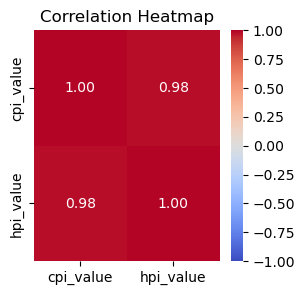

In [314]:
#Correlation heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(combine_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Descriptive statistics

In [315]:
# CPI dataframe
cpi_df.describe()

,cpi_value
count,162.000000
mean,106.944464
std,9.556926
min,93.753615
25%,100.383628
50%,104.225191
75%,111.219946
max,131.152501


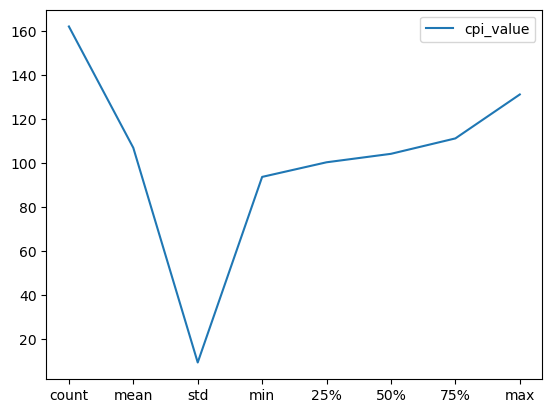

In [316]:
#Plot the statistical summary for CPI data
cpi_df.describe().plot()
plt.show()

In [317]:
# HPI dataframe summary statistics
hpi_df.describe()

,hpi_value
count,162.000000
mean,132.749561
std,34.108468
min,92.989028
25%,104.331799
50%,124.832626
75%,146.817854
max,207.613041


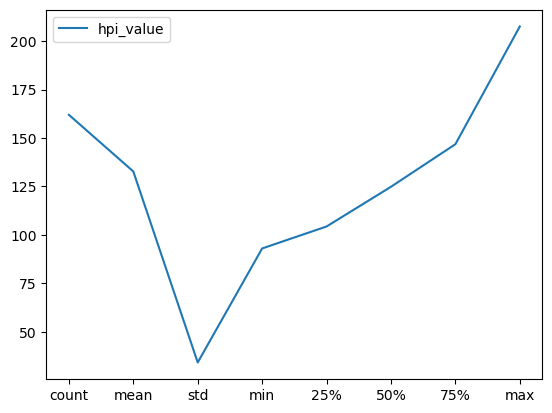

In [318]:
# Plot the statistical summary for HPI dataframe
hpi_df.describe().plot()
plt.show()

## Outlier detection

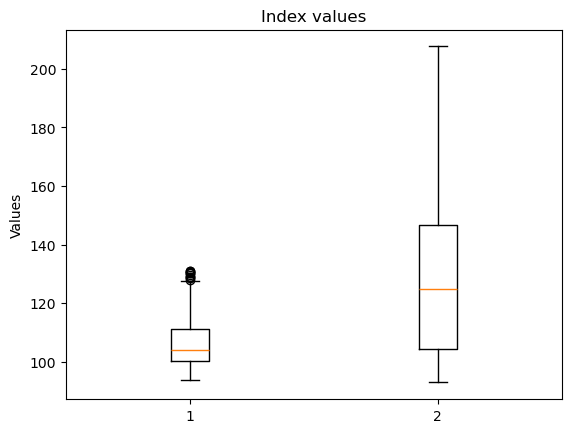

In [319]:
# Boxplots
fig1, ax1 = plt.subplots()
ax1.set_title('Index values')
ax1.set_ylabel('Values')
ax1.boxplot(combine_df)
#sns.boxplot(combine_df)
plt.show()